### Demonstration of ray-tracing with Shadow and diffraction with SimEx

This notebook showcases a short demonstration of a ray-tracing simulation of the ID23-2 beamline of ESRF. The output is then saved as openPMD hdf5 file and used as an input for SimEx. GAPD calculator is used to calculate diffracted intensity.

In [1]:
# Python script to run shadow3. Created automatically with ShadowTools.make_python_script_from_list().
import Shadow
import numpy

# write (1) or not (0) SHADOW files start.xx end.xx star.xx
iwrite = 0

Initialize Shadow source, beam and optical elements parameters. Beamline sketch from J. Syn. Rad. 17 (2010), 107-118, ISSN: 1600-5775, https://doi.org/10.1107/S0909049509041168 (https://journals.iucr.org/s/issues/2010/01/00/hi5601/index.html):
<img src="ID23_distances.png">

In [3]:
#
# initialize shadow3 source (oe0) and beam
#
beam = Shadow.Beam()
oe0 = Shadow.Source()
oe1 = Shadow.OE()
oe2 = Shadow.OE()
oe3 = Shadow.OE()
oe4 = Shadow.OE()
oe5 = Shadow.OE()

#
# Define variables. See meaning of variables in: 
#  https://raw.githubusercontent.com/srio/shadow3/master/docs/source.nml 
#  https://raw.githubusercontent.com/srio/shadow3/master/docs/oe.nml
#

oe0.FDISTR = 3
oe0.F_COLOR = 3
oe0.F_PHOT = 0
oe0.F_POLAR = 0
oe0.HDIV1 = 0.0
oe0.HDIV2 = 0.0
oe0.IDO_VX = 0
oe0.IDO_VZ = 0
oe0.IDO_X_S = 0
oe0.IDO_Y_S = 0
oe0.IDO_Z_S = 0
oe0.ISTAR1 = 5676561
oe0.NPOINT = 500000
oe0.PH1 = 14100.0
oe0.PH2 = 14300.0
oe0.SIGDIX = 9.5e-05
oe0.SIGDIZ = 3.1e-06
oe0.SIGMAX = 6.1e-05
oe0.SIGMAZ = 9e-06
oe0.VDIV1 = 0.0
oe0.VDIV2 = 0.0

oe1.DUMMY = 100.0
oe1.FWRITE = 3
oe1.F_REFRAC = 2
oe1.F_SCREEN = 1
oe1.N_SCREEN = 1
oe1.T_IMAGE = 0.0
oe1.T_INCIDENCE = 0.0
oe1.T_REFLECTION = 180.0
oe1.T_SOURCE = 28.2

oe2.DUMMY = 100.0
oe2.FHIT_C = 1
oe2.FILE_REFL = b'/home/aljosa/Oasys/development_sprint/si5_15.111'
oe2.FWRITE = 1
oe2.F_CENTRAL = 1
oe2.F_CRYSTAL = 1
oe2.PHOT_CENT = 14200.0
oe2.RLEN1 = 0.02
oe2.RLEN2 = 0.02
oe2.RWIDX1 = 0.15
oe2.RWIDX2 = 0.15
oe2.R_LAMBDA = 5000.0
oe2.T_IMAGE = 0.0
oe2.T_INCIDENCE = 81.9952066442
oe2.T_REFLECTION = 81.9952066442
oe2.T_SOURCE = 1.8

oe3.DUMMY = 100.0
oe3.FWRITE = 3
oe3.F_REFRAC = 2
oe3.F_SCREEN = 1
oe3.I_SLIT = numpy.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
oe3.N_SCREEN = 1
oe3.RX_SLIT = numpy.array([0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
oe3.RZ_SLIT = numpy.array([0.0008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
oe3.T_IMAGE = 0.0
oe3.T_INCIDENCE = 0.0
oe3.T_REFLECTION = 180.0
oe3.T_SOURCE = 10.9

oe4.DUMMY = 100.0
oe4.FCYL = 1
oe4.FHIT_C = 1
oe4.FMIRR = 2
oe4.FWRITE = 3
oe4.F_DEFAULT = 0
oe4.RLEN1 = 0.15
oe4.RLEN2 = 0.15
oe4.RWIDX1 = 0.02
oe4.RWIDX2 = 0.02
oe4.SIMAG = 2.1
oe4.SSOUR = 43.15
oe4.THETA = 89.77654645989898
oe4.T_IMAGE = 0.1
oe4.T_INCIDENCE = 89.77654645989898
oe4.T_REFLECTION = 89.77654645989898
oe4.T_SOURCE = 2.25

oe5.ALPHA = 90.0
oe5.DUMMY = 100.0
oe5.FCYL = 1
oe5.FHIT_C = 1
oe5.FMIRR = 2
oe5.FWRITE = 3
oe5.F_DEFAULT = 0
oe5.RLEN1 = 0.15
oe5.RLEN2 = 0.15
oe5.RWIDX1 = 0.02
oe5.RWIDX2 = 0.02
oe5.SIMAG = 1.9
oe5.SSOUR = 43.35
oe5.THETA = 89.77654645989898
oe5.T_IMAGE = 1.9
oe5.T_INCIDENCE = 89.77654645989898
oe5.T_REFLECTION = 89.77654645989898
oe5.T_SOURCE = 0.1

Run Shadow and propagate the rays

In [4]:
#Run SHADOW to create the source

if iwrite:
    oe0.write("start.00")

beam.genSource(oe0)

if iwrite:
    oe0.write("end.00")
    beam.write("begin.dat")


#
#run optical element 1
#
print("    Running optical element: %d"%(1))
if iwrite:
    oe1.write("start.01")

beam.traceOE(oe1,1)

if iwrite:
    oe1.write("end.01")
    beam.write("star.01")


#
#run optical element 2
#
print("    Running optical element: %d"%(2))
if iwrite:
    oe2.write("start.02")

beam.traceOE(oe2,2)

if iwrite:
    oe2.write("end.02")
    beam.write("star.02")


#
#run optical element 3
#
print("    Running optical element: %d"%(3))
if iwrite:
    oe3.write("start.03")

beam.traceOE(oe3,3)

if iwrite:
    oe3.write("end.03")
    beam.write("star.03")


#
#run optical element 4
#
print("    Running optical element: %d"%(4))
if iwrite:
    oe4.write("start.04")

beam.traceOE(oe4,4)

if iwrite:
    oe4.write("end.04")
    beam.write("star.04")


#
#run optical element 5
#
print("    Running optical element: %d"%(5))
if iwrite:
    oe5.write("start.05")

beam.traceOE(oe5,5)

if iwrite:
    oe5.write("end.05")
    beam.write("star.05")

    Running optical element: 1
    Running optical element: 2
    Running optical element: 3
    Running optical element: 4
    Running optical element: 5


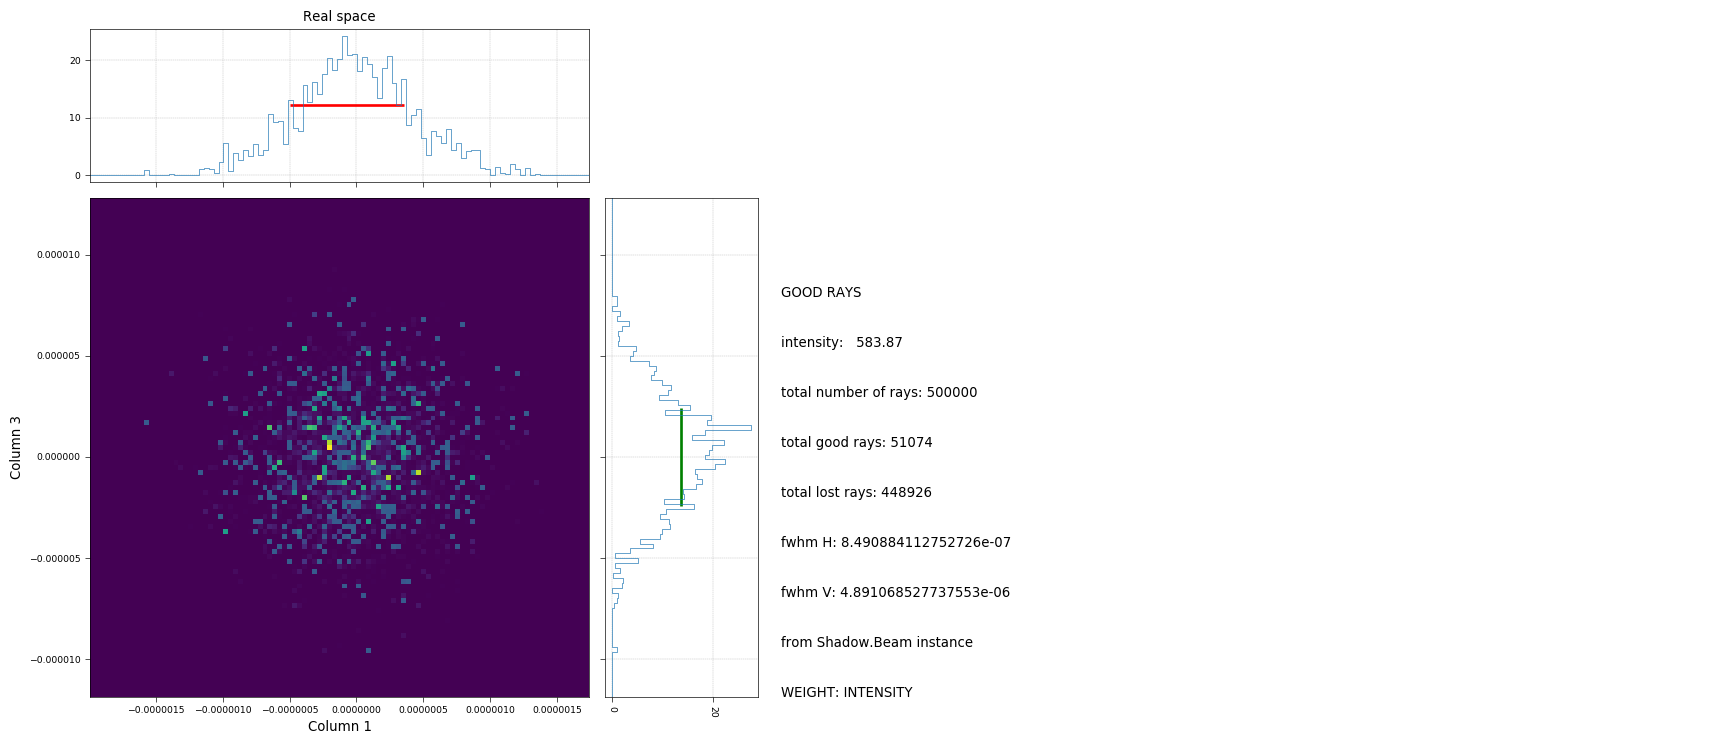

{'error': 1,
 'col_h': 1,
 'col_v': 3,
 'nolost': 1,
 'nbins_h': 101,
 'nbins_v': 101,
 'ref': 23,
 'xrange': [-1.990104372208159e-06, 1.738501259913701e-06],
 'yrange': [-1.1863169686467419e-05, 1.2836726378607122e-05],
 'bin_h_edges': array([-1.99010437e-06, -1.95318748e-06, -1.91627060e-06, -1.87935371e-06,
        -1.84243682e-06, -1.80551993e-06, -1.76860305e-06, -1.73168616e-06,
        -1.69476927e-06, -1.65785239e-06, -1.62093550e-06, -1.58401861e-06,
        -1.54710172e-06, -1.51018484e-06, -1.47326795e-06, -1.43635106e-06,
        -1.39943417e-06, -1.36251729e-06, -1.32560040e-06, -1.28868351e-06,
        -1.25176662e-06, -1.21484974e-06, -1.17793285e-06, -1.14101596e-06,
        -1.10409907e-06, -1.06718219e-06, -1.03026530e-06, -9.93348411e-07,
        -9.56431524e-07, -9.19514636e-07, -8.82597749e-07, -8.45680861e-07,
        -8.08763974e-07, -7.71847086e-07, -7.34930199e-07, -6.98013312e-07,
        -6.61096424e-07, -6.24179537e-07, -5.87262649e-07, -5.50345762e-07,
    

In [5]:
Shadow.ShadowTools.plotxy(beam,1,3,nbins=101,nolost=1,title="Real space")
# Shadow.ShadowTools.plotxy(beam,1,4,nbins=101,nolost=1,title="Phase space X")
# Shadow.ShadowTools.plotxy(beam,3,6,nbins=101,nolost=1,title="Phase space Z")
    

### Save output to hdf file

In [6]:
import openpmd_api as api
import time
import datetime
import numpy as np
from numpy.random import random

def saveShadowToHDF(oasysRaysObject, filename='raytracing_out.h5'):
    '''
    Beam.getshonecol(colNo)
    Extract a column from a shadow file (eg. begin.dat) or a Shadow.Beam instance.
    The column are numbered in the fortran convention, i.e. starting from 1.
    It returns a numpy.array filled with the values of the chosen column.

    Inumpy.ts:
       beam     : str instance with the name of the shadow file to be loaded. OR
                  Shadow.Beam initialized instance.
       col      : int for the chosen columns.

    Outputs:
       numpy.array 1-D with length numpy.INT.

    Error:
       if an error occurs an ArgsError is raised.

    Possible choice for col are:
             1   X spatial coordinate [user's unit]
             2   Y spatial coordinate [user's unit]
             3   Z spatial coordinate [user's unit]
             4   Xp direction or divergence [rads]
             5   Yp direction or divergence [rads]
             6   Zp direction or divergence [rads]
             7   X component of the electromagnetic vector (s-polariz)
             8   Y component of the electromagnetic vector (s-polariz)
             9   Z component of the electromagnetic vector (s-polariz)
            10   Lost ray flag
            11   Energy [eV]
            12   Ray index
            13   Optical path length
            14   Phase (s-polarization) in rad
            15   Phase (p-polarization) in rad
            16   X component of the electromagnetic vector (p-polariz)
            17   Y component of the electromagnetic vector (p-polariz)
            18   Z component of the electromagnetic vector (p-polariz)
            19   Wavelength [A]
            20   R= SQRT(X^2+Y^2+Z^2)
            21   angle from Y axis
            22   the magnitude of the Electromagnetic vector
            23   |E|^2 (total intensity)
            24   total intensity for s-polarization
            25   total intensity for p-polarization
            26   K = 2 pi / lambda [A^-1]
            27   K = 2 pi / lambda * col4 [A^-1]
            28   K = 2 pi / lambda * col5 [A^-1]
            29   K = 2 pi / lambda * col6 [A^-1]
            30   S0-stokes = |Es|^2 + |Ep|^2
            31   S1-stokes = |Es|^2 - |Ep|^2
            32   S2-stokes = 2 |Es| |Ep| cos(phase_s-phase_p)
            33   S3-stokes = 2 |Es| |Ep| sin(phase_s-phase_p)
            34   Power = intensity(col 23) * energy (col 11)
            35   Angle-X with Y: |arcsin(X')|
            36   Angle-Z with Y: |arcsin(Z')|
            37   Angle-X with Y: |arcsin(X') - mean(arcsin(X'))|
            38   Angle-Z with Y: |arcsin(Z') - mean(arcsin(Z'))|
    '''

    SCALAR = api.Mesh_Record_Component.SCALAR
    oasysRays = oasysRaysObject
    try:
        unit = workspace_units_to_cm # Conversion to cm
    except:
        unit = 100.
       
    #Unit_Dimension: length L, mass M, time T, electric current I, thermodynamic temperature theta, amount of substance N, luminous intensity J
    
    series = api.Series(filename, api.Access_Type.create)
    
    # get date
    dateNow = time.strftime('%Y-%m-%d %H:%M:%S %z', time.localtime())
    
    # default series settings
    print("Default settings:")
    print("basePath: ", series.base_path)
    print("openPMD version: ", series.openPMD)
    print("iteration format: ", series.iteration_format)

    # openPMD standard
    series.set_openPMD("1.1.0")
    series.set_openPMD_extension(0)
    series.set_author("Aljosa Hafner <aljosa.hafner@ceric-eric.eu>")

    series.set_date(dateNow)
    series.set_software("OASYS", "1.2")
    series.set_comment("Example output from ShadowOui widget in OASYS.")

#     series.set_particles_path("rays")

    # new iteration
    cur_it = series.iterations[0]

    nRays = oasysRays.nrays()

    rays = cur_it.particles['rays']

    # id
    id = oasysRays.getshonecol(12)
    d = api.Dataset(id.dtype, id.shape)
    rays["id"][SCALAR].reset_dataset(d)
    rays["id"][SCALAR].store_chunk(id)

    # Position 
    position_x = oasysRays.getshonecol(1)
    position_y = oasysRays.getshonecol(2)
    position_z = oasysRays.getshonecol(3)
        
    # Position in [m]
    d = api.Dataset(position_x.dtype, position_x.shape)
    rays["position"]["x"].reset_dataset(d)
    rays["position"]["x"].set_unit_SI(unit/1e2)
    rays["position"]["y"].reset_dataset(d)
    rays["position"]["y"].set_unit_SI(unit/1e2)
    rays["position"]["z"].reset_dataset(d)
    rays["position"]["z"].set_unit_SI(unit/1e2)
    rays["position"].set_unit_dimension({api.Unit_Dimension.L: 1.0})
    rays["position"]["x"].store_chunk(position_x)
    rays["position"]["y"].store_chunk(position_y)
    rays["position"]["z"].store_chunk(position_z)

    # Direction
    direction_x = oasysRays.getshonecol(4)
    direction_y = oasysRays.getshonecol(5)
    direction_z = oasysRays.getshonecol(6)

    # Direction in [rad]
    d = api.Dataset(direction_x.dtype, direction_x.shape)
    rays["direction"]["x"].reset_dataset(d)
    rays["direction"]["x"].set_unit_SI(1.0)
    rays["direction"]["y"].reset_dataset(d)
    rays["direction"]["y"].set_unit_SI(1.0)
    rays["direction"]["z"].reset_dataset(d)
    rays["direction"]["z"].set_unit_SI(1.0)
    rays["direction"]["x"].store_chunk(direction_x)
    rays["direction"]["y"].store_chunk(direction_y)
    rays["direction"]["z"].store_chunk(direction_z)

    # Polarization of E-field, S-polarization
    sPol_x = oasysRays.getshonecol(7)
    sPol_y = oasysRays.getshonecol(8)
    sPol_z = oasysRays.getshonecol(9)

    # S-polarization in [unitless]
    d = api.Dataset(sPol_x.dtype, sPol_x.shape)
    rays["eFieldSPolarisation"]["x"].reset_dataset(d)
    rays["eFieldSPolarisation"]["x"].set_unit_SI(1.0)
    rays["eFieldSPolarisation"]["y"].reset_dataset(d)
    rays["eFieldSPolarisation"]["y"].set_unit_SI(1.0)
    rays["eFieldSPolarisation"]["z"].reset_dataset(d)
    rays["eFieldSPolarisation"]["z"].set_unit_SI(1.0)
    rays["eFieldSPolarisation"]["x"].store_chunk(sPol_x)
    rays["eFieldSPolarisation"]["y"].store_chunk(sPol_y)
    rays["eFieldSPolarisation"]["z"].store_chunk(sPol_z)

    # Polarization of E-field, P-polarization
    pPol_x = oasysRays.getshonecol(16)
    pPol_y = oasysRays.getshonecol(17)
    pPol_z = oasysRays.getshonecol(18)

    # P-polarization in [unitless]
    d = api.Dataset(pPol_x.dtype, pPol_x.shape)
    rays["eFieldPPolarisation"]["x"].reset_dataset(d)
    rays["eFieldPPolarisation"]["x"].set_unit_SI(1.0)
    rays["eFieldPPolarisation"]["y"].reset_dataset(d)
    rays["eFieldPPolarisation"]["y"].set_unit_SI(1.0)
    rays["eFieldPPolarisation"]["z"].reset_dataset(d)
    rays["eFieldPPolarisation"]["z"].set_unit_SI(1.0)
    rays["eFieldPPolarisation"]["x"].store_chunk(pPol_x)
    rays["eFieldPPolarisation"]["y"].store_chunk(pPol_y)
    rays["eFieldPPolarisation"]["z"].store_chunk(pPol_z)

    # Photon energy [1.602176634e−19 eV = J = kg m^2 s^-2]
    energy = oasysRays.getshonecol(11)
    d = api.Dataset(energy.dtype, energy.shape)
    rays["photonEnergy"][SCALAR].reset_dataset(d)
    rays["photonEnergy"][SCALAR].set_unit_SI(1.602176634e-19)
    rays["photonEnergy"].set_unit_dimension({api.Unit_Dimension.L: 2.,
                                             api.Unit_Dimension.M: 1.,
                                             api.Unit_Dimension.T: -2.})
    rays["photonEnergy"][SCALAR].store_chunk(energy)

    # Photon wavelength [A]
    wavelength = oasysRays.getshonecol(19)
    d = api.Dataset(wavelength.dtype, wavelength.shape)
    rays["photonWavelength"][SCALAR].reset_dataset(d)
    rays["photonWavelength"][SCALAR].set_unit_SI(1e-10)
    rays["photonWavelength"].set_unit_dimension({api.Unit_Dimension.L: 1.})
    rays["photonWavelength"][SCALAR].store_chunk(wavelength)

    # Phase for S-polarized and P-polarized photons
    phase_sPol_r = oasysRays.getshonecol(14)
    phase_pPol_r = oasysRays.getshonecol(15)

    # Phase [rad]
    d = api.Dataset(phase_sPol_r.dtype, phase_sPol_r.shape)
    rays["phase"]["sPol_r"].reset_dataset(d)
    rays["phase"]["sPol_r"].set_unit_SI(1.0)
    rays["phase"]["pPol_r"].reset_dataset(d)
    rays["phase"]["pPol_r"].set_unit_SI(1.0)
    rays["phase"]["sPol_r"].store_chunk(phase_sPol_r)
    rays["phase"]["pPol_r"].store_chunk(phase_pPol_r)
    
    # Total intensity [unitless]
    intensity = oasysRays.getshonecol(23)
    d = api.Dataset(intensity.dtype, intensity.shape)
    rays["totalIntensity"][SCALAR].reset_dataset(d)
    rays["totalIntensity"][SCALAR].set_unit_SI(1.0)
    rays["totalIntensity"][SCALAR].store_chunk(intensity)
    
    # Lost rays
    lost_ray = oasysRays.getshonecol(10)
    d = api.Dataset(intensity.dtype, intensity.shape)
    rays["lostRay"][SCALAR].reset_dataset(d)
    rays["lostRay"][SCALAR].set_unit_SI(1.0)
    rays["lostRay"][SCALAR].store_chunk(intensity)
    
    series.flush()
        
    del series

saveShadowToHDF(oasysRaysObject=beam)

Default settings:
basePath:  /data/%T/
openPMD version:  1.1.0
iteration format:  /data/%T/


# SimEx

In [7]:
import os,shutil
from SimEx.Calculators.GAPDPhotonDiffractor import GAPDPhotonDiffractor
from SimEx.Parameters.GAPDPhotonDiffractorParameters import GAPDPhotonDiffractorParameters
from SimEx.Parameters.DetectorGeometry import DetectorGeometry, DetectorPanel
from SimEx.Parameters.PhotonBeamParameters import PhotonBeamParameters
from SimEx.Utilities.Units import meter, electronvolt, joule, radian

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

initializing ocelot...



### Detector setup

In [8]:
detector_panel = DetectorPanel(
            ranges={
                'fast_scan_min': 0,
                'fast_scan_max': 200,
                'slow_scan_min': 0,
                'slow_scan_max': 200
            },
            pixel_size=2200e-6 * meter,
            photon_response=1.0,
            distance_from_interaction_plane=0.25 * meter,
            corners={
                'x': -100,
                'y': -100
            },
        )
detector_geometry = DetectorGeometry(panels=[detector_panel])

### Polychromatic beam setup

In [9]:
beamSimEx = './raytracing_out.h5'

### Sample preparation

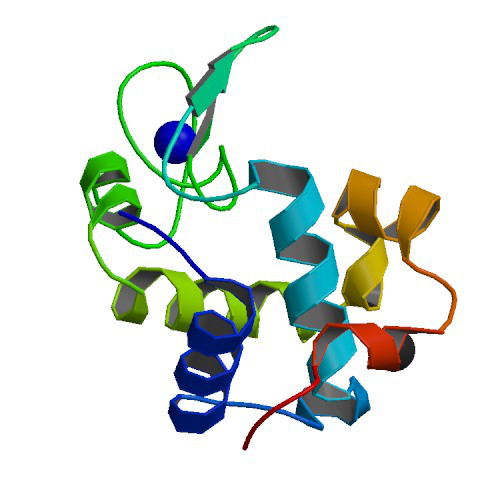

In [10]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://cdn.rcsb.org/images/rutgers/wu/3wul/3wul.pdb1-500.jpg')
img = Image.open(BytesIO(response.content))
display(img)

### Diffractor setup

In [11]:
outfile = 'diffr_poly_1.txt'

parameters = GAPDPhotonDiffractorParameters(
            detector_geometry=detector_geometry,
            beam_parameters=beamSimEx,
            number_of_spectrum_bins = 100)

diffractor = GAPDPhotonDiffractor(parameters=parameters,
                                          input_path='single-cu.xyz',
                                          output_path=outfile)

Passing beam parameters as a tratracing_out file.


In [12]:
diffractor.backengine()

GAPDPhotonDiffractor backengine command: mpirun -np 6 --map-by node --bind-to none -x OMPI_MCA_mpi_warn_on_fork=0 -x OMPI_MCA_btl_base_warn_component_unused=0 GAPD-SimEx -a -p in.param


0

### Poly Spectrum

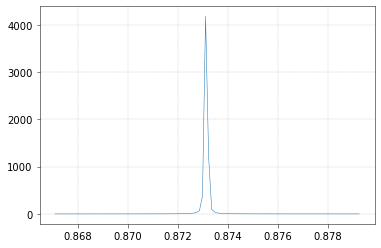

In [13]:
spec = np.loadtxt('spectrum.txt')
plt.plot(spec[:,0],spec[:,1])

### Diffraction pattern

(201, 201)


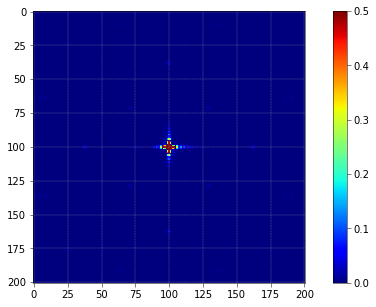

In [14]:
data = np.loadtxt(outfile,ndmin=2)
print (data.shape)
fig = plt.figure(figsize=(10,5))
plt.imshow(data,
           vmax = 0.5,
           cmap=cm.jet)
plt.colorbar()
plt.show()

(201, 201)


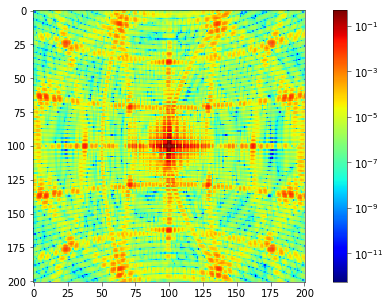

In [15]:
data = np.loadtxt(outfile,ndmin=2)
print (data.shape)
fig = plt.figure(figsize=(10,5))
plt.imshow(data,
           vmax = 0.5,
           cmap=cm.jet,
           norm=colors.LogNorm(vmin=data.min(), vmax=data.max())
          )
plt.colorbar()
plt.show()